In [1]:
# 농수축 & 이미용 EDAddd
# !pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm.notebook import tqdm
import requests
import xmltodict
import re
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# pd.set_option('display.max_rows', 100)
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [13]:
high_low_dict.keys()

dict_keys(['의류', '농수축', '잡화', '주방', '건강기능', '가전', '생활용품', '가구', '속옷', '이미용', '침구'])

In [2]:
with open('c:/bc/high_low_dict.pickle','rb') as f:
    high_low_dict = pickle.load(f)

In [3]:
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

def model_df(group):
    df = high_low_dict[group][['p_group','exp_min','DAY_NUM','season','timeslot','holiday','mask_ratio','parcel_ratio','score']]
    df.timeslot = df.timeslot.astype('int64')
    df = pd.get_dummies(df, columns=['DAY_NUM'])
    df = pd.get_dummies(df, columns=['season'])
    df = pd.get_dummies(df, columns=['timeslot'])
    df = pd.get_dummies(df, columns=['holiday'])
#     df = pd.get_dummies(df, columns=['brand_name'])
    df[['exp_min']] = minmaxscaler.fit_transform(df[['exp_min']])
    
    df = df[['p_group','exp_min', 'mask_ratio',
       'parcel_ratio', 'DAY_NUM_1', 'DAY_NUM_2', 'DAY_NUM_3', 'DAY_NUM_4',
       'DAY_NUM_5', 'DAY_NUM_6', 'DAY_NUM_7', 'season_1', 'season_2',
       'season_3', 'season_4', 'timeslot_1', 'timeslot_2', 'timeslot_3',
       'timeslot_4', 'timeslot_5', 'timeslot_6', 'timeslot_7', 'holiday_0',
       'holiday_1', 'score']]
    return df.iloc[:,1:]

In [5]:
def feature_random_forest(group):
    data = np.array(model_df(group)).astype('float64')
    
    x = data[:,0:-1]
    y = data[:,-1]

    trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

    rf = RandomForestClassifier(max_depth=3, n_estimators=100)
    rf = rf.fit(trainX, trainY)
    fi = rf.feature_importances_
    fn = list(model_df(group).columns)
    n_f = trainX.shape[1]
    idx = np.arange(n_f)
    plt.barh(idx,fi,align = 'center')
    plt.yticks(idx,fn,size=12)
    plt.show()

In [6]:
# def plottree(group):
#     data = np.array(model_df(group)).astype('float64')
    
#     x = data[:,0:-1]
#     y = data[:,-1]

#     trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

#     rf = RandomForestClassifier(max_depth=3, n_estimators=100)
#     rf = rf.fit(trainX, trainY)
#     fi = rf.feature_importances_
#     fn = list(model_df(group).columns)
#     n_f = trainX.shape[1]
#     idx = np.arange(n_f)
    
#     plot_tree(rf)

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


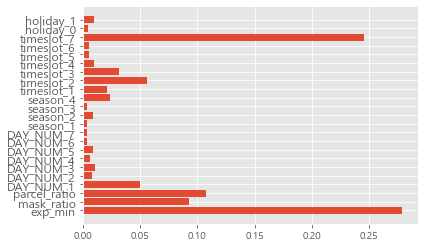

In [8]:
feature_random_forest('의류')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


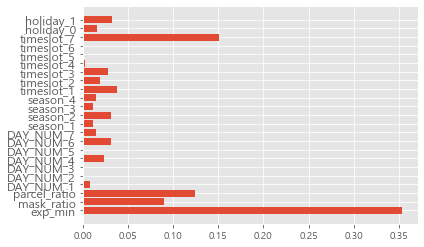

In [9]:
feature_random_forest('잡화')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


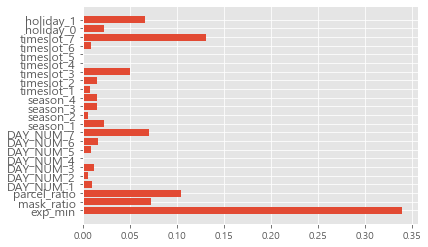

In [10]:
feature_random_forest('생활용품')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


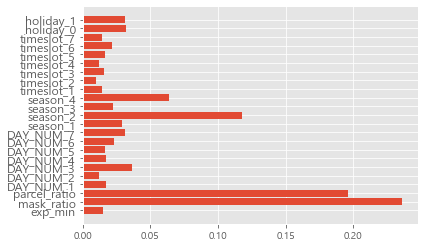

In [11]:
feature_random_forest('가전')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


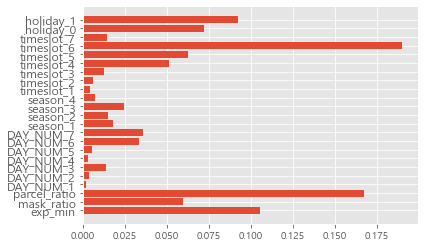

In [14]:
feature_random_forest('농수축')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


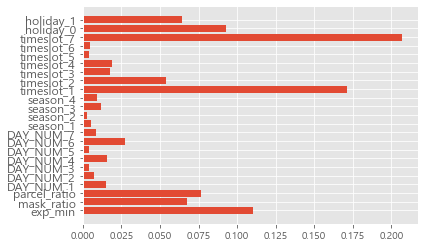

In [15]:
feature_random_forest('주방')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


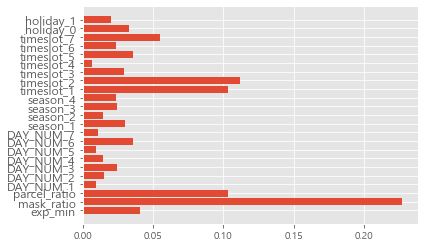

In [16]:
feature_random_forest('건강기능')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


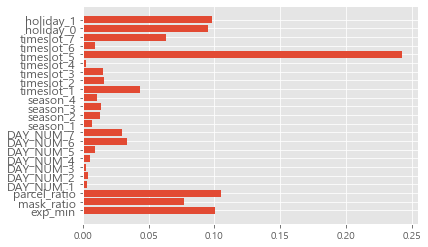

In [21]:
feature_random_forest('이미용')

In [22]:
feature_random_forest('침구')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KeyError: "['season_4', 'timeslot_5'] not in index"

In [23]:
feature_random_forest('가구')

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


KeyError: "['timeslot_1', 'timeslot_3', 'timeslot_2', 'timeslot_4'] not in index"